In [1]:
import numpy as np

def line_search(forward, x, p, data):
    # Backtracking Line Search
    alpha = 1.0  # Initial step size
    c = 0.1      # Parameter for controlling step size reduction
    rho = 0.5    # Fraction by which alpha is reduced

    # Evaluate the objective function at the current model
    current_objective = 0.5 * np.linalg.norm(data - forward(x))**2

    while True:
        # Try a candidate step
        x_new = x + alpha * p

        # Evaluate the objective function at the candidate model
        candidate_objective = 0.5 * np.linalg.norm(data - forward(x_new))**2

        # Armijo-Goldstein condition for backtracking line search
        if candidate_objective <= current_objective + c * alpha * np.dot(p, p):
            break
        else:
            # Reduce the step size
            alpha *= rho

    return alpha

# Example usage:
# Define your forward model function 'forward(model)'.
# Initialize an initial model 'initial_model'.
# Initialize the data 'data'.
# Call the nonlinear_conjugate_gradient function to optimize the model.
# optimized_model = nonlinear_conjugate_gradient(forward, initial_model, data)


In [ ]:
import numpy as np

def nonlinear_conjugate_gradient(forward, model, data, max_iterations=100, tolerance=1e-6):
    # Initialize variables
    x = model.copy()
    r = data - forward(x)
    p = r.copy()
    rsold = np.dot(r, r)

    for i in range(max_iterations):
        # Compute the step size (alpha) using a line search or other method
        alpha = line_search(forward, x, p, data)

        # Update the model
        x = x + alpha * p

        # Compute the new residual
        r_new = data - forward(x)

        # Compute the beta value for the next iteration
        rsnew = np.dot(r_new, r_new)
        beta = rsnew / rsold

        # Update the search direction
        p = r_new + beta * p

        # Update the residual and its squared norm
        r = r_new
        rsold = rsnew

        # Check for convergence
        if np.sqrt(rsnew) < tolerance:
            break

    return x


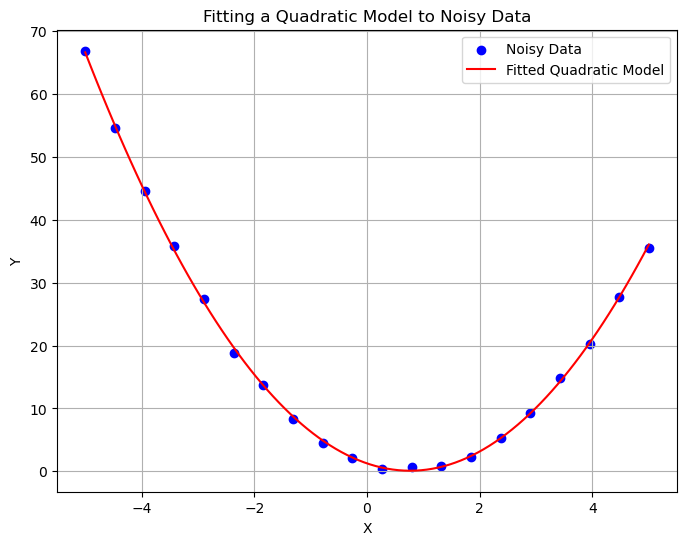

Optimized Parameters:
a: 2.00331746002752
b: -3.0568613004248055
c: 1.2541117604609184


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true parameters of the quadratic equation
a_true = 2.0
b_true = -3.0
c_true = 1.0

# Generate synthetic data with noise
np.random.seed(0)
x = np.linspace(-5, 5, 20)
noise = np.random.normal(0, 0.5, x.shape)
y_true = a_true * x**2 + b_true * x + c_true
y_noisy = y_true + noise

# Define the forward model
def forward_model(x, params):
    a, b, c = params
    return a * x**2 + b * x + c

# Define the objective function to be minimized (least squares error)
def objective_function(params):
    predictions = forward_model(x, params)
    error = y_noisy - predictions
    return np.sum(error**2)

# Initial guess for the parameters
initial_params = [1.0, -2.0, 0.5]

# Perform optimization to fit the quadratic model to the data
from scipy.optimize import minimize

result = minimize(objective_function, initial_params, method='CG')  # You can choose different optimization methods

# Extract the optimized parameters
optimized_params = result.x

# Plot the original data and the fitted quadratic model
plt.figure(figsize=(8, 6))
plt.scatter(x, y_noisy, label='Noisy Data', color='b')
x_plot = np.linspace(-5, 5, 100)
y_plot = forward_model(x_plot, optimized_params)
plt.plot(x_plot, y_plot, label='Fitted Quadratic Model', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting a Quadratic Model to Noisy Data')
plt.grid(True)
plt.show()

print("Optimized Parameters:")
print("a:", optimized_params[0])
print("b:", optimized_params[1])
print("c:", optimized_params[2])


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true parameters of the quadratic equation
a_true = 2.0
b_true = -3.0
c_true = 1.0

# Generate synthetic data with noise
np.random.seed(0)
x = np.linspace(-5, 5, 20)
noise = np.random.normal(0, 0.5, x.shape)
y_true = a_true * x**2 + b_true * x + c_true
y_noisy = y_true + noise

# Define the forward model
def forward_model(params):
    a, b, c = params
    return a * x**2 + b * x + c

# Define the objective function to be minimized (least squares error)
def objective_function(params):
    predictions = forward_model(params)
    error = y_noisy - predictions
    return np.sum(error**2)

# Initial guess for the parameters
initial_params = [1.0, -2.0, 0.5]

# Nonlinear Conjugate Gradient (NCG) optimization
def line_search(forward, x, p, data):
    # Simple fixed step size
    alpha = 0.1
    return alpha

def nonlinear_conjugate_gradient(forward, model, data, max_iterations=100, tolerance=1e-6):
    x = model.copy()
    r = data - forward(x)
    p = r.copy()
    rsold = np.dot(r, r)

    for i in range(max_iterations):
        alpha = line_search(forward, x, p, data)
        x = x + alpha * p
        r_new = data - forward(x)
        rsnew = np.dot(r_new, r_new)
        beta = rsnew / rsold
        p = r_new + beta * p
        r = r_new
        rsold = rsnew

        if np.sqrt(rsnew) < tolerance:
            break

    return x

optimized_params = nonlinear_conjugate_gradient(forward_model, initial_params, y_noisy)

# Plot the original data and the fitted quadratic model
plt.figure(figsize=(8, 6))
plt.scatter(x, y_noisy, label='Noisy Data', color='b')
x_plot = np.linspace(-5, 5, 100)
y_plot = forward_model(optimized_params)
plt.plot(x_plot, y_plot, label='Fitted Quadratic Model', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting a Quadratic Model to Noisy Data (NCG)')
plt.grid(True)
plt.show()

print("Optimized Parameters (NCG):")
print("a:", optimized_params[0])
print("b:", optimized_params[1])
print("c:", optimized_params[2])


ValueError: operands could not be broadcast together with shapes (3,) (20,) 